# Polinomios lineales a trozo (1D)

Ejecutar este documento en forma dinámica: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rirastorza/Intro2FEM/blob/master/Polinomios_constantes_atrozo/polinomios.ipynb)


## Introducción

En este tutorial describiremos una familia funciones (polinomios lineales a trozos, en realidad un espacio vectorial de funciones) que son fáciles de implementar en un software y que sirven para aproximar otras funciones. La idea general es: si tenemos puntos de una función poder crear una función continua como combinación de varias que sean más fáciles de integrar.


## Polinomios lineales a trozos

### Espacio de polinomios lineales

Sea un intervalo real dado por $I = [x_{0},x_{1}]$. Definimos $\mathscr{P}_{1}(I)$ como **el espacio vectorial de las funciones lineales**:

$$\mathscr{P}_{1}(I)= \left \{   v: v(x)=c_{0}+c_{1}x, x \in I, c_{0},c_{1} \in \mathbf{R} \right \}\tag{1}$$

esto quiere decir que $\mathscr{P}_{1}(I)$ contiene todas las funciones lineales de la forma $v(x)=c_{0}+c_{1}x$ que viven en el intervalo $I$. 

Una **base** en este espacio pueden ser dos funciones cuya combinación lineal pueda represenatar cualquier $v(x)$. Por ejemplo: si queremos representar la función $v(x)=8-x/3$ con la base $\lambda_{0}(x)=2$ y $\lambda_{1}(x)=x/2$ debemos hacer $v(x)=4\lambda_{0}(x)-\frac{2}{3}\lambda_{1}(x)$. Noten que aquí debimos multiplicar las funciones base por dos coeficientes $\xi_{0}=4$ y $\xi_{1}= -\frac{2}{3}$, esto es, representamos a $v(x)$ como combinación lineal de las funciones base. A estos coeficientes se les llama **grados de libertad**, decimos que $v(x)$ tiene dos grados de libertad.

Busquemos otras bases un poco más interesantes. Si tenemos dos puntos en el plano dados por $(x_{0},v(x_{0}))$ y $(x_{1},v(x_{1}))$, denominamos a $x_{0}$ y $x_{1}$ **nodos** y a $v(x_{0})=\xi_{0}$ y $v(x_{1})=\xi_{1}$ **valores en los nodos**, entonces ¿Cuáles son las funciones base si queremos representar $v(x)$ de la siguiente forma?

$$v(x)=\xi_{0}\lambda_{0}(x)+\xi_{1}\lambda_{1}(x)\tag{2}$$

Noten que ahora los coeficientes que multiplican a las bases son los valores en los nodos. Para responder la pregunta anterior, podemos pensar que:

$$\lambda_{j}(x_{i})= \left \{ \begin{array}{l} 1 \text{ si } i = j \\  0 \text{ si } i \neq j \end{array} \right . \tag{3}$$

Entonces las siguientes bases lo cumplen:

$$ \lambda_{0}(x)=\frac{x_{1}-x}{x_{1}-x_{0}} \ \ \text{  y } \ \ \lambda_{1}(x)=\frac{x-x_{0}}{x_{1}-x_{0}}  $$


### Espacio de polinomios lineales continuos a trozos

Pensemos en que queremos hacer lo siguiente:

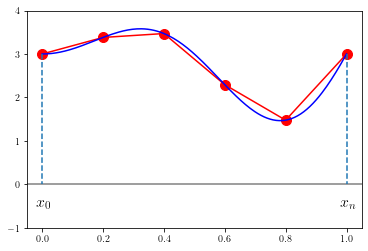

In [2]:
from __future__ import print_function
import numpy as np #importo numpy y lo denomino np
import matplotlib.pyplot as plt
%matplotlib inline
nx = 5 #numero de intervalos
nodos = nx+1 #cantidad de nodos
xi = np.linspace(0,1,nodos) #nodos equiespaciados
vi = 2.0*xi*np.sin(2.0*np.pi*xi)+3.0 #valores en los nodos
x = np.linspace(0,1,200) #continuo
v = 2.0*x*np.sin(2.0*np.pi*x)+3.0 #funcion
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(1,1)
axs.plot(xi,vi,'-ro',markersize=10)
axs.plot(x,v,'b')
axs.set_ylim(-1,4)
axs.axhline(0, color='gray')
axs.vlines(xi[0],vi[0],0,linestyles='dashed')
axs.annotate(r'$x_{0}$', xy=(xi[0]-0.02, -0.5),fontsize=16)
axs.vlines(xi[-1],vi[-1],0,linestyles='dashed')
axs.annotate(r'$x_{n}$', xy=(xi[-1]-0.02, -0.5),fontsize=16);

Es decir, tenemos una función $f(x)$ (en azul) y la queremos aproximar por la función en rojo, la llamaremos $v(x)$. Notemos también que hemos partido el intervalo $I=\left[ 0,1\right]$ con $n+1$ nodos, es decir, en $n$ subintervalos $I_{i}$. Observemos que $v(x)$ es lineal a trozos. Diremos que $v(x)$ vive en el espacio vectorial de funciones lineales a trozo y a este espacio lo denominaremos $V_{h}$ (donde $h$ viene de $h = x_{i+1}- x_{i}$, el ancho de cada subintervalo). Ahora una definición más formal:

$$V_{h} = \left \{ v: v \in \mathscr{C}^{0}(I), v \vert_{I_{i}} \in \mathscr{P}_{1}(I_{i}) \right \}\tag{4}$$

donde los símbolos significan que deben ser continuas y que en cada subintervalo deben pertenecer al espacion $\mathscr{P}_{1}$, es decir, que sea lineal.

Es importante mencionar que si $v$ pertenece a $V_{h}$ entonces está determinado por sus _valores nodales_ $\left \{ v(x_{i}) \right \}_{i=0}^{n}$ y si tengo los valores nodales determinan $v$. Entonces de manera similar al razonamiento de la sección anterior, introduciremos las bases:

$$ \varphi_{j}(x_{i})= \left \{ \begin{array}{l} 1 \ \ \text{ si } \ \ i = j \\  0  \ \ \text{ si }  \ \ i \neq j \end{array} \right . \tag{5}$$

para $i,j = 1, \dots, n$. Y ahora le pedimos que sean continuas entre los puntos.

$$ \varphi_{j}(x)= \left \{ \begin{array}{l} \frac{x-x_{i-1}}{h_{i}} \ \ \text{ si } \ \ x\in I_{i} \\  \frac{x_{i+1}-x}{h_{i+1}}  \ \ \text{ si }  \ \ x\in I_{i+1}\\ 0  \ \ \text{caso contrario} \end{array} \right . \tag{6}$$

Las llamaremos **funciones sombrero**, que tienen la siguiente forma que codificaremos a continuación.

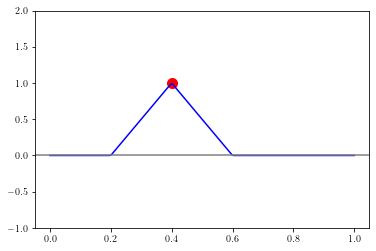

In [8]:
#Definimos la función sombrero
def phi(x,xi,i):
    hi = xi[1]-xi[0]
    f = np.zeros_like(x)
    for m in range(len(x)):
        if i == 0:
            if xi[i] <= x[m] < xi[i+1]:
                f[m] = (xi[i+1]-x[m])/(xi[i+1]-xi[i])
            else:
                f[m] = 0.0        
        elif i == len(xi):
            if (xi[i-1] < x[m] <= xi[i]):
                f[m] = (x[m]-xi[i-1])/(xi[i]-xi[i-1])
            else:
                f[m] = 0.0
        else:
            if (xi[i-1] < x[m] <= xi[i]):
                f[m] = (x[m]-xi[i-1])/(xi[i]-xi[i-1])
            elif xi[i] < x[m] <= xi[i+1]:
                f[m] = (xi[i+1]-x[m])/(xi[i+1]-xi[i])
            else:
                f[m] = 0.0
        
    return f


#k = 2
k = 2#primera
#k = nx#ultima
phik = phi(x,xi,k)#primera
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(1,1)
axs.plot(xi[k],phi(np.asarray([xi[k]]),xi,k),'-ro',markersize=10)
axs.plot(x,phik,'b')
axs.set_ylim(-1,2)
axs.axhline(0, color='gray');


Observemos la Ec. (6) se obtiene a partir de la ecuación de la recta que pasa por los puntos del plano $(x_{i-1},0)$ y $(x_{i},1)$ (para el lado izquierdo del nodo) y $(x_{i},1)$ y $(x_{i+1},0)$ (para el lado derecho del nodo). Salvo para los dos extremos, en los que solo hay medio sombrero. 

En el ejemplo3.py vemos que es posible expresar una función $v(x)$ de la forma:

$$v(x) = \sum_{i=0}^{n} \xi_{i}\varphi_{i}(x) \tag{7}$$

Ahora podemos decir que cualquier función $v(x)$ que pertenece al espacio $V_{h}$ puede ser representada como una combinación lineal de la base de funciones sombrero.

### Interpolación

Sigamos con lo que empezamos: tratar de interpolar la función $f(x)$. Denominemos $\pi f(x)$ (antes $v(x)$) al interpolante lineal, de tal manera que se cumpla:

$$f(x) \approx \pi f(x) = \sum_{i=0}^{n} f(x_{i})\varphi_{i}(x) \tag{8}$$

Notar que esto significa que aproximamos una función (que puede ser no lineal) como una combinación lineal (suma) de funciones lineales a trozos. Una pregunta que nos podemos hacer es ¿Cómo cuantifico el **error** que se comete en la aproximación?

![Error en interpolación](figura1.png "Error en interpolación")

Podría usar $f-\pi f$ pero se podrían compensar los errores, es conveniente entonces definir lo que se denomina una norma. En este caso definiremos la **norma $L^{2}$**. Esta se define como:

$$ \left \| f-\pi f \right \|^{2}_{L^{2}(I)}= \left ( \int_{I} \left (   f-\pi f\right )^{2} dx\right )^{\frac{1}{2}}\tag{9}$$

Se puede demostrar que:

$$\left \| f-\pi f \right \|^{2}_{L^{2}(I)}= \sum_{i=0}^{n}c h_{i}^{4} \left \| f'' \right \|^{2}_{L^{2}(I)} \tag{10}$$

donde $c$ es una constante. Esto indica que:

- Si $h_{i} \rightarrow 0 \Rightarrow$ el error tiende a cero también.
- Si $f''$ es grande $\Rightarrow$ el error será grande también.

Estos puntos son interesantes porque permiten tener cierto control sobre el error, que no depende tanto de la función $f$ sino de su segunda derivada, y que haciendo $h_{i}$ lo más pequeño posible podemos llegar a reducirlo.

Debemos remarcar que en el caso que querramos aproximar una función con interpolación, el valor en los nodos es exacto.

### Proyección $L^{2}$

Podemos aproximar una función $f$ no solo con interpolación, también podemos tomar otros enfoques.  Uno de ellos es la proyección ortogonal, que lo que intenta es dar una buena aproximación en promedio, aunque en los nodos podría no ser exacta. Otro punto interesante de esta aproximación es que no es necesario que la función $f(x)$ sea continua ni que esté bien definida en los nodos, como es el caso en la interpolación. 

La definición de la proyección $L^{2}$ denotada como $\mathscr{P}_{h}f \in V_{h}$ es la siguiente:

$$\int_{I} ( f-\mathscr{P}_{h}f )v dx = 0, \ \  \forall \ v \in V_{h} \tag{11}$$

Esta definición indica que la proyección $\mathscr{P}_{h}f$ es la mejor aproximación de $f$ si consideramos la norma $L^{2}$.

Ahora veremos como operar para aproximar la función. Notemos que la Ec. (11) es similar a la siguiente:

$$\int_{I} ( f-\mathscr{P}_{h}f )\varphi_{i} dx = 0, \ \  i=0,1,\dots,n \tag{12}$$

porque las funciones sombreros pertenecen a $V_{h}$. Como $\mathscr{P}_{h}f$ pertenece a $V_{h}$ entonces también se puede expresar:

$$\mathscr{P}_{h}f = \sum_{j=0}^{n}\xi_{j}\varphi_{j} \tag{13}$$

donde los $\xi_{j}$ con $j=0,\dots,n$ serán los $n+1$ coeficientes desconocidos que deben ser determinados. Podemos combinar Ec. (13) con la Ec. (12) y obtendremos:

$$\int_{I} f \varphi_{i} dx = \int_{I} \left ( \sum_{j=0}^{n}\xi_{j}\varphi_{j} \right ) \varphi_{i} dx = \sum_{j=0}^{n}\xi_{j} \int_{I} \varphi_{j} \varphi_{i} dx \tag{14}$$

Se puede introducir la notación:

$$M_{i,j} = \int_{I} \varphi_{j}\varphi_{i}dx \tag{15}$$

$$b_{i} = \int_{I} f\varphi_{i}dx \tag{16}$$

y se tiene:

$$b_{i}=\sum_{j=0}^{n} M_{i,j}\xi_{j} \tag{17}$$

para las tres últimas ecuaciones $i=0,\dots,n$. Variando ahora $j=0,\dots,n$ entonces tendremos una expresión matricial de la forma:

$$M\xi = b \tag{18}$$

donde M es una matriz de $(n+1)\times (n+1)$ y $\xi$ y $b$ son vectores de forma $(n+1)\times 1$. A $M$ se la llama **matriz de masa** y a $b$ **vector de carga**.

Así como obtuvimos una expresión del **error** para la interpolación, aquí se puede hacer lo mismo. Se llega a la siguiente expresión:

$$ \left \| f-\mathscr{P}_{h}f  \right \|_{L^{2}(I)} \leq Ch^{2} \left \| f''  \right \|_{L^{2}(I)} \tag{19}$$

donde $h$ es el máximo subintervalo, lo que quiere decir que cuando tiende a cero la malla también tenderá a cero el error $L^2$.

Para el ejemplo que venimos tratando se puede calcular con el procedimiento que explicamos. El resultado es el que muestra la siguiente figura.

![Error en proyección L2](figura2.png "Error en interpolación con proyección ortogonal L2")

Se puede ver que con la proyección ortogonal parece que el error es un poco menor, aunque hay que pensar que es el error de la norma $L^{2}$. También se ve que la solución no es exacta en los nodos. El código para obtener esto lo pueden ver en el ejemplo4.py.

### Integración

Note que para calcular la matriz de masa debemos integrar las funciones sombrero, esto es fácil porque son lineales. Incluso podemos tener los valores analíticos (primitiva) ya resueltos como constantes en nuestro programa (dependerán del tamaño de la malla). Pero para el caso del vector de carga necesitamos integrar:

$$b_{i} = \int_{I} f\varphi_{i}dx \tag{20}$$

aquí $f$ es la función a aproximar. Esto lo podemos realizar con técnicas numéricas:

- Punto medio
- Trapezoidal
- Simpson

En todos los casos la idea sería que tomemos en cada subintervalo los puntos de los nodos y los valores de la función. En el caso de la regla de Simpson, son necesarios tres puntos. 